In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer


In [2]:
try:
    df = sns.load_dataset('tips')
    print('Dataset loaded Successfully')
except :
    print(f"❌ Dataset not found")
    


Dataset loaded Successfully


In [3]:
df.isnull().sum().sort_values(ascending=False)

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [4]:
fig_1=px.box(df,x='total_bill')
fig_1.show()

In [5]:
fig_1=px.violin(df,x='tip')
fig_1.show()

In [6]:
from sklearn.compose import make_column_selector as selector


nums=Pipeline([
    ('scaler',RobustScaler())
])

cats=Pipeline([
    ('encoder', OrdinalEncoder())
    ])


preprocessor = ColumnTransformer([
    ('num', nums, selector(dtype_include='number')),
    ('cat', cats, selector(dtype_include='object'))
])



preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"


In [7]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
df['tip']=df['tip']>2
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,False,Female,No,Sun,Dinner,2
1,10.34,False,Male,No,Sun,Dinner,3
2,21.01,True,Male,No,Sun,Dinner,3
3,23.68,True,Male,No,Sun,Dinner,2
4,24.59,True,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,True,Male,No,Sat,Dinner,3
240,27.18,False,Female,Yes,Sat,Dinner,2
241,22.67,False,Male,Yes,Sat,Dinner,2
242,17.82,False,Male,No,Sat,Dinner,2


In [8]:
X=df.drop('tip',axis=1)
y=df['tip']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train_processed=preprocessor.fit_transform(X_train)
X_test_processed=preprocessor.transform(X_test)

In [10]:
from xgboost import XGBRFClassifier
from sklearn.ensemble import AdaBoostClassifier


In [15]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier())
])

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 1.0],
    'classifier__algorithm': ['SAMME', 'SAMME.R']
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,                   
    scoring='accuracy',      
    n_jobs=3
)               


grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)



In [ ]:
#Evaluating The Model
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision Score: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall Score: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

print("\nClassification Report\n", classification_report(y_test, y_pred))




Accuracy Score: 0.7959
Precision Score: 0.8007
Recall Score: 0.7959
F1 Score: 0.7928

Classification Report
               precision    recall  f1-score   support

       False       0.83      0.68      0.75        22
        True       0.77      0.89      0.83        27

    accuracy                           0.80        49
   macro avg       0.80      0.79      0.79        49
weighted avg       0.80      0.80      0.79        49



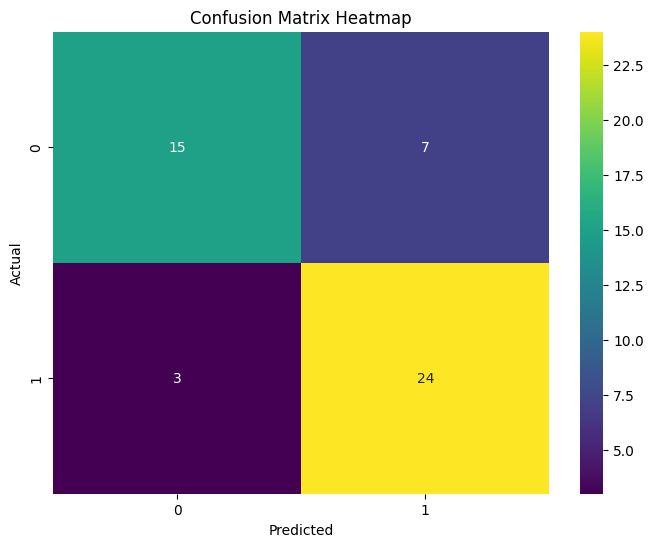

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='viridis')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import joblib
joblib.dump(model, "ada_pipeline.pkl")

['ada_pipeline.pkl']

In [ ]:
!pip freeze > requirement.txt